In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 200

In [2]:
!pip install tensorflow
import tensorflow
from tensorflow.keras.models import Sequential
from keras.layers import Dense

# Problem Statement
Predicting turbine energy yield (TEY) using ambient variables as features, with the help of Neural network.

In [3]:
df = pd.read_csv(r"E:\Data Science\Assignments\Neural Networks\gas_turbines.csv")
df.head(10)

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
5,7.6998,1010.7,92.708,3.5236,19.683,1059.8,549.97,114.72,10.626,3.4467,82.409
6,7.7901,1011.6,91.983,3.5298,19.659,1060.0,549.87,114.71,10.644,3.4874,82.440
7,7.7139,1012.7,91.348,3.5088,19.673,1059.8,549.92,114.71,10.656,3.6043,83.010
8,7.7975,1013.8,90.196,3.5141,19.634,1060.1,550.09,114.72,10.644,3.3943,82.284
9,8.0820,1015.0,88.597,4.0612,23.406,1083.0,550.21,131.70,11.679,1.9081,82.782


In [4]:
df=df[['AT','AP','AH','AFDP','GTEP','TIT','TAT','CDP','CO','NOX','TEY']]
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX,TEY
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722,114.70
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776,114.72
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468,114.71
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670,114.72
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311,114.72
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,10.400,4.5186,79.559,111.61
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,10.433,4.8470,79.917,111.78
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,10.483,7.9632,90.912,110.19
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,10.533,6.2494,93.227,110.74


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   CDP     15039 non-null  float64
 8   CO      15039 non-null  float64
 9   NOX     15039 non-null  float64
 10  TEY     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [6]:
df[df.duplicated()]

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX,TEY


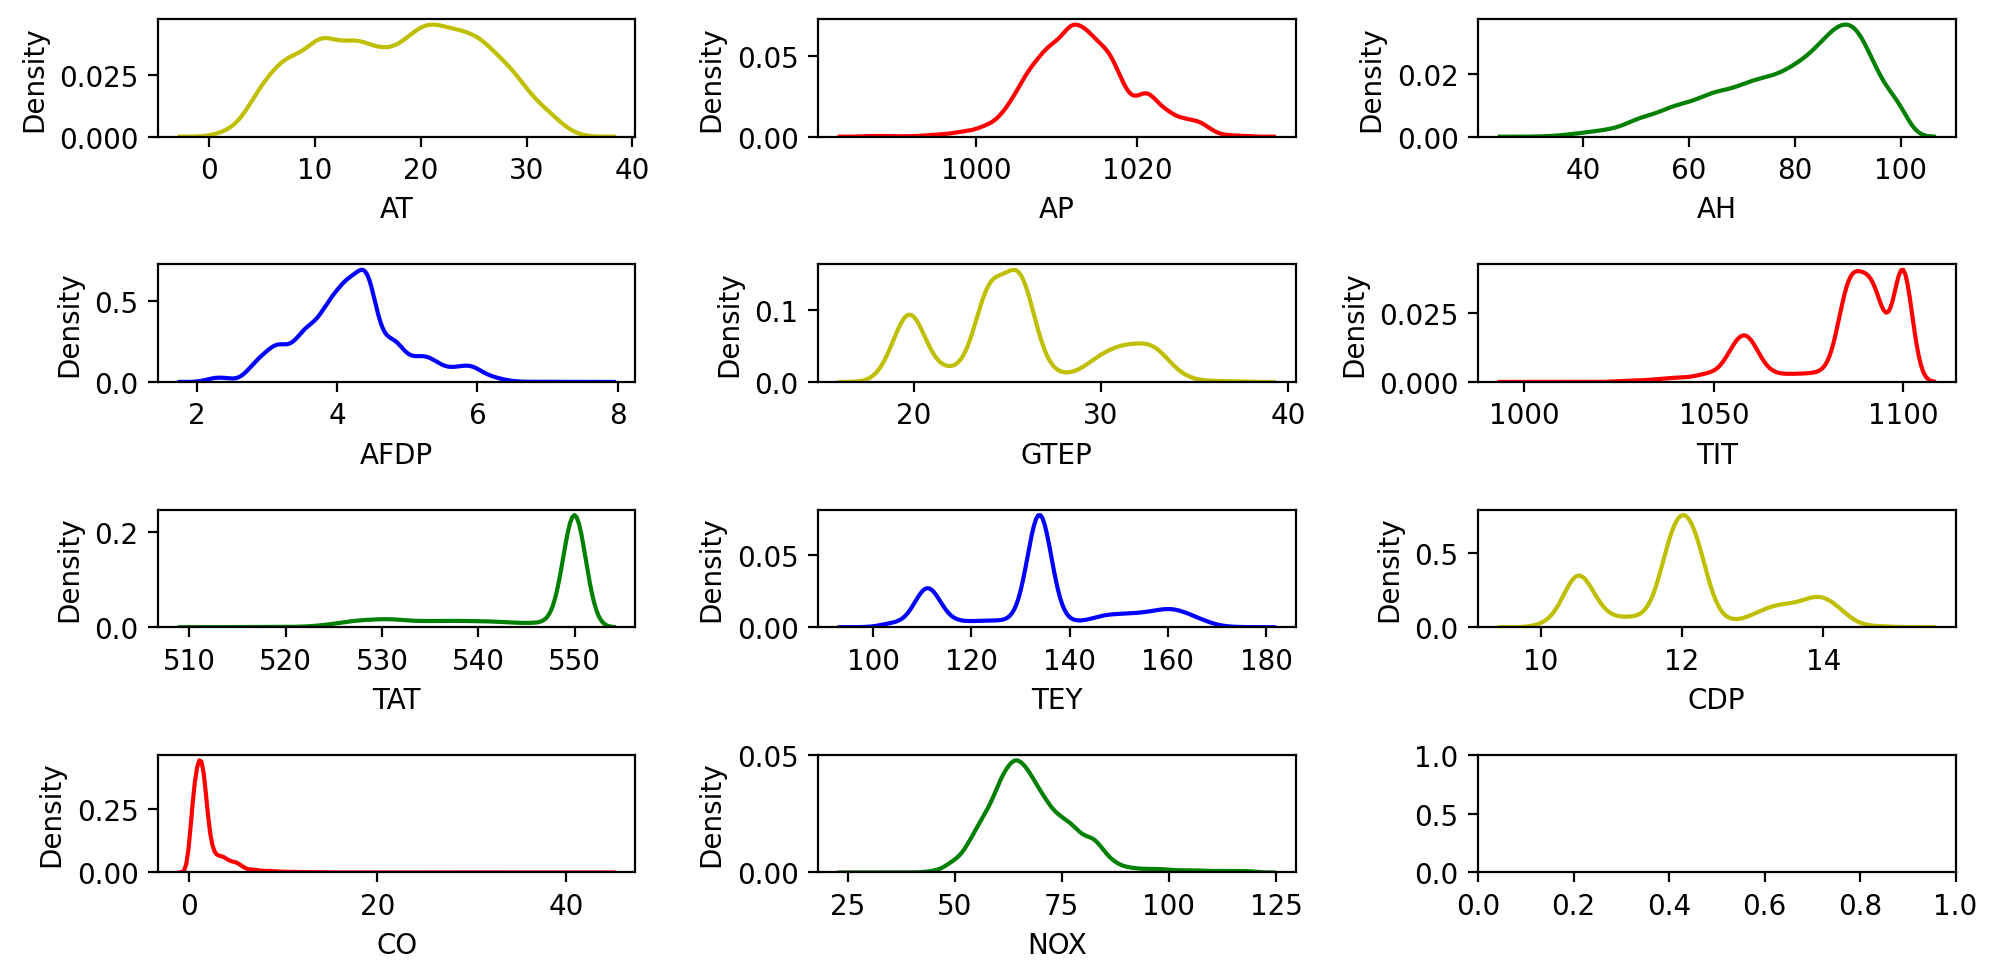

In [7]:
fig, ax = plt.subplots(4, 3)
sns.kdeplot(df.AT, ax=ax[0,0],color='y')
sns.kdeplot(df.AP, ax=ax[0,1],color='r')
sns.kdeplot(df.AH, ax=ax[0,2],color='g')
sns.kdeplot(df.AFDP, ax=ax[1,0],color='b')
sns.kdeplot(df.GTEP, ax=ax[1,1],color='y')
sns.kdeplot(df.TIT, ax=ax[1,2],color='r')
sns.kdeplot(df.TAT, ax=ax[2,0],color='g')
sns.kdeplot(df.TEY, ax=ax[2,1],color='b')
sns.kdeplot(df.CDP, ax=ax[2,2],color='y')
sns.kdeplot(df.CO, ax=ax[3,0],color='r')
sns.kdeplot(df.NOX, ax=ax[3,1],color='g')

plt.tight_layout()
plt.show()

In [8]:
scale=MinMaxScaler()
df=pd.DataFrame(scale.fit_transform(df),columns=['AT','AP','AH','AFDP','GTEP','TIT','TAT','TEY','CDP','CO','NOX'])
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,0.184182,0.456050,0.951314,0.255758,0.091426,0.584,0.984015,0.135340,0.071522,0.596548,0.195191
1,0.182020,0.466391,0.955881,0.255721,0.094755,0.585,0.984015,0.133988,0.073372,0.597134,0.195459
2,0.185295,0.474664,0.939003,0.252571,0.097367,0.586,0.980608,0.134567,0.072576,0.593791,0.195325
3,0.189922,0.482937,0.929126,0.252227,0.098033,0.588,0.983753,0.135533,0.072375,0.595984,0.195459
4,0.199830,0.493278,0.927708,0.255323,0.096650,0.589,0.983491,0.136692,0.073647,0.592087,0.195459
...,...,...,...,...,...,...,...,...,...,...,...
15034,0.247272,0.408480,0.975092,0.263380,0.065868,0.489,0.884696,0.095739,0.102448,0.562214,0.153681
15035,0.214075,0.414685,0.984153,0.256826,0.078672,0.455,0.806342,0.102113,0.109894,0.566100,0.155965
15036,0.195962,0.422958,0.989922,0.251593,0.084614,0.369,0.651730,0.111772,0.180552,0.685449,0.134605
15037,0.188443,0.433299,0.982936,0.246451,0.076777,0.424,0.754455,0.121431,0.141693,0.710578,0.141994


In [9]:
from sklearn.preprocessing import LabelEncoder
labelencoder_df = LabelEncoder()
df=df.apply(LabelEncoder().fit_transform)
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,1230,292,12092,2208,787,292,2285,461,10695,10885,707
1,1199,297,12149,2207,842,293,2285,454,10775,10892,709
2,1251,301,11882,2148,883,294,2272,457,10746,10835,708
3,1334,305,11699,2138,892,296,2284,462,10738,10875,709
4,1505,310,11676,2197,871,297,2283,468,10782,10774,709
...,...,...,...,...,...,...,...,...,...,...,...
15034,2278,269,12369,2376,382,197,1964,256,11809,10229,491
15035,1732,272,12467,2230,577,163,1742,289,12015,10317,508
15036,1433,276,12533,2121,675,83,1247,339,12818,11571,352
15037,1302,281,12449,2009,545,135,1583,389,12579,11636,406


In [10]:
df['TEY'].describe()

count    15039.000000
mean      1651.010240
std        886.953843
min          0.000000
25%       1200.000000
50%       1596.000000
75%       2088.500000
max       3610.000000
Name: TEY, dtype: float64

In [11]:
df['TEY_New']=pd.cut(df.TEY,bins=[0,1739,4206],labels=[0,1])
df=df.drop(['TEY'],axis=1)
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX,TEY_New
0,1230,292,12092,2208,787,292,2285,10695,10885,707,0
1,1199,297,12149,2207,842,293,2285,10775,10892,709,0
2,1251,301,11882,2148,883,294,2272,10746,10835,708,0
3,1334,305,11699,2138,892,296,2284,10738,10875,709,0
4,1505,310,11676,2197,871,297,2283,10782,10774,709,0
...,...,...,...,...,...,...,...,...,...,...,...
15034,2278,269,12369,2376,382,197,1964,11809,10229,491,0
15035,1732,272,12467,2230,577,163,1742,12015,10317,508,0
15036,1433,276,12533,2121,675,83,1247,12818,11571,352,0
15037,1302,281,12449,2009,545,135,1583,12579,11636,406,0


In [12]:
df.TEY_New.nunique

<bound method IndexOpsMixin.nunique of 0        0
1        0
2        0
3        0
4        0
        ..
15034    0
15035    0
15036    0
15037    0
15038    0
Name: TEY_New, Length: 15039, dtype: category
Categories (2, int64): [0 < 1]>

In [13]:
df = df.values
df

array([[ 1230,   292, 12092, ..., 10885,   707,     0],
       [ 1199,   297, 12149, ..., 10892,   709,     0],
       [ 1251,   301, 11882, ..., 10835,   708,     0],
       ...,
       [ 1433,   276, 12533, ..., 11571,   352,     0],
       [ 1302,   281, 12449, ..., 11636,   406,     0],
       [ 1266,   285, 12227, ..., 11620,   488,     0]], dtype=int64)

In [14]:
X = df[:,0:10]
y = df[:,10]


In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.33)

In [16]:
# Constructing a Sequential neural network with
#1. input neurons:32neurons  
#2.  hidden layer :10 neurons 
#3. output layer:1neuron

In [17]:
model = Sequential()
model.add(Dense(32, input_dim=10, kernel_initializer='random_uniform', activation='relu'))
model.add(Dense(10, kernel_initializer='random_uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='random_uniform', activation='sigmoid'))

In [18]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### Model Fitting

In [19]:
history = model.fit(X_train, y_train,epochs=150, batch_size=10)

Epoch 1/150


1008/1008 [==============================] - 2s 1ms/step - loss: 0.1865 - accuracy: 0.9148
Epoch 2/150
1008/1008 [==============================] - 1s 1ms/step - loss: 0.1567 - accuracy: 0.9295
Epoch 3/150
1008/1008 [==============================] - 1s 1ms/step - loss: 0.1492 - accuracy: 0.9317
Epoch 4/150
1008/1008 [==============================] - 1s 1ms/step - loss: 0.1431 - accuracy: 0.9349
Epoch 5/150
1008/1008 [==============================] - 2s 2ms/step - loss: 0.1407 - accuracy: 0.9332
Epoch 6/150
1008/1008 [==============================] - 2s 2ms/step - loss: 0.1377 - accuracy: 0.9390
Epoch 7/150
1008/1008 [==============================] - 1s 1ms/step - loss: 0.1380 - accuracy: 0.9376
Epoch 8/150
1008/1008 [==============================] - 2s 2ms/step - loss: 0.1316 - accuracy: 0.9387
Epoch 9/150
1008/1008 [==============================] - 2s 2ms/step - loss: 0.1369 - accuracy: 0.9393
Epoch 10/150
1008/1008 [==============================] - 2s 2ms/step -

1008/1008 [==============================] - 2s 2ms/step - loss: 0.1196 - accuracy: 0.9445
Epoch 76/150
1008/1008 [==============================] - 1s 1ms/step - loss: 0.1178 - accuracy: 0.9463
Epoch 77/150
1008/1008 [==============================] - 1s 1ms/step - loss: 0.1183 - accuracy: 0.9475
Epoch 78/150
1008/1008 [==============================] - 1s 1ms/step - loss: 0.1164 - accuracy: 0.9476
Epoch 79/150
1008/1008 [==============================] - 1s 1ms/step - loss: 0.1171 - accuracy: 0.9460
Epoch 80/150
1008/1008 [==============================] - 2s 2ms/step - loss: 0.1155 - accuracy: 0.9486
Epoch 81/150
1008/1008 [==============================] - 2s 2ms/step - loss: 0.1183 - accuracy: 0.9465
Epoch 82/150
1008/1008 [==============================] - 1s 1ms/step - loss: 0.1157 - accuracy: 0.9487
Epoch 83/150
1008/1008 [==============================] - 1s 1ms/step - loss: 0.1180 - accuracy: 0.9464
Epoch 84/150
1008/1008 [==============================] - 1s 1ms/step - loss:

In [20]:
# Evaluation of model

In [21]:
scores = model.evaluate(X, y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

470/470 [==============================] - 1s 1ms/step - loss: -115026637300432896.0000 - accuracy: 0.9490
accuracy: 94.90%


In [22]:
model.history.history.keys()

dict_keys([])

KeyError: 'val_accuracy'

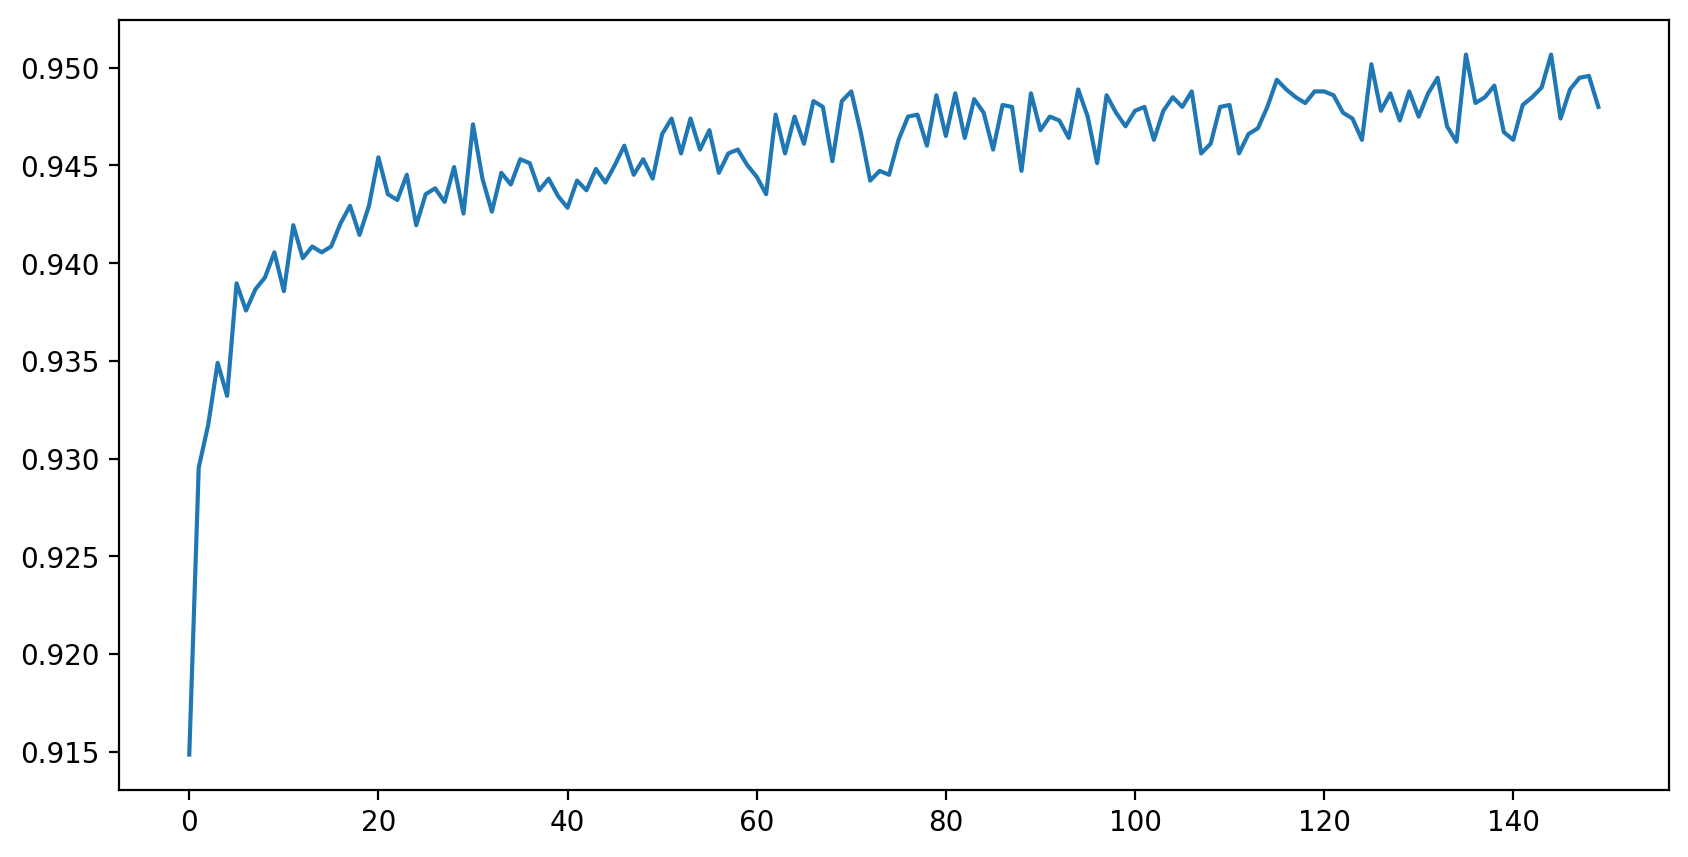

In [25]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

KeyError: 'val_loss'

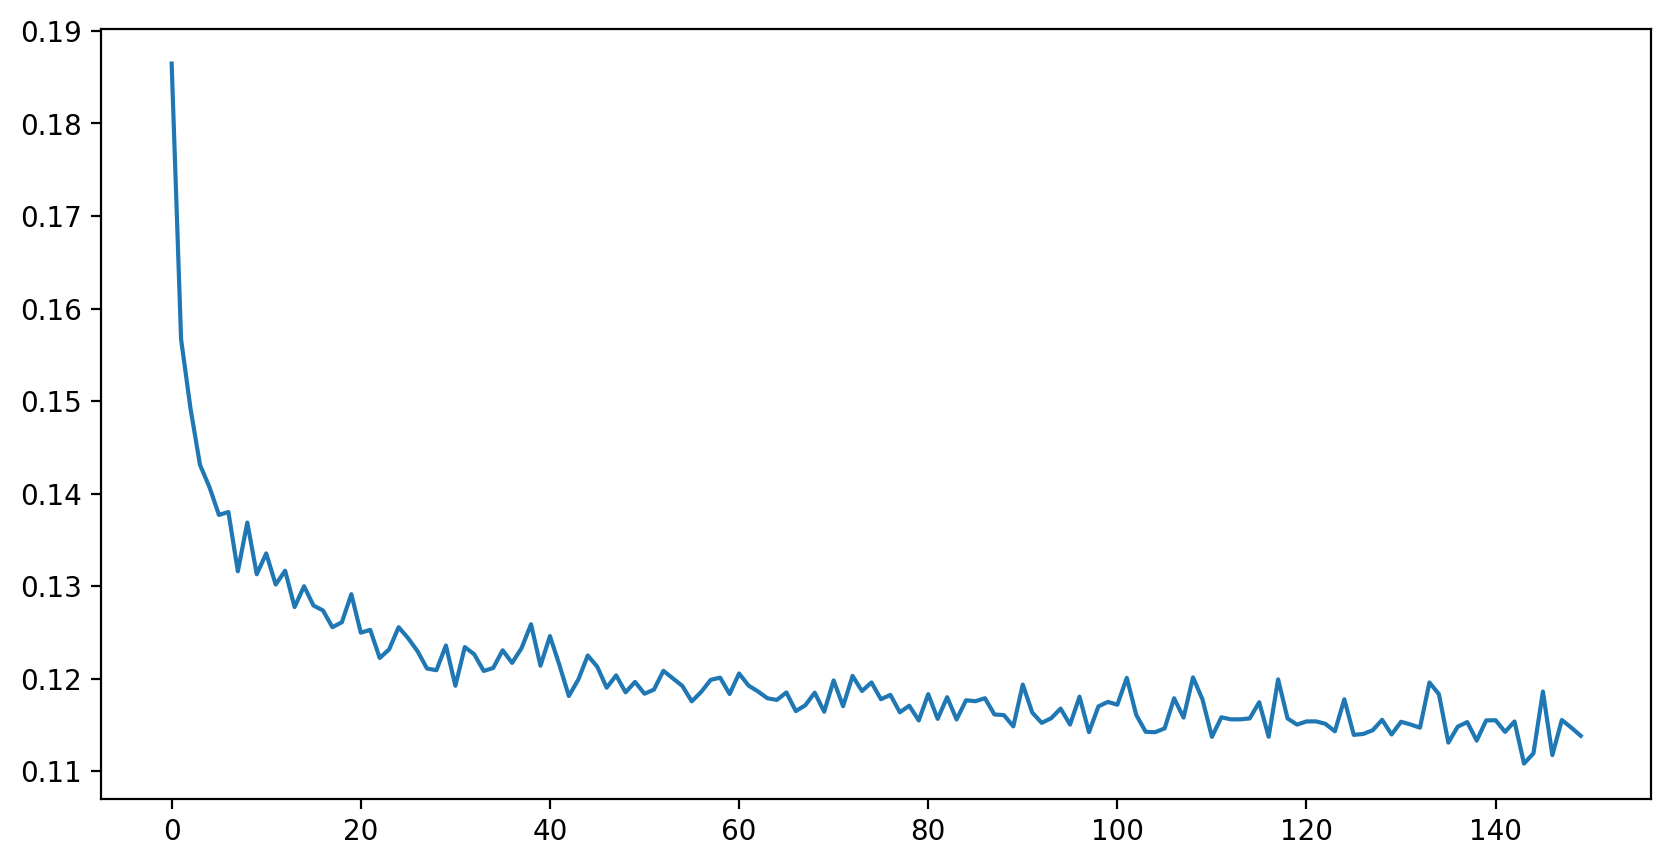

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss') 
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


## Inference:

The neural network helps predicting the turbine energy yield (TEY) using ambient variables as features, with the accuracy score 94.90% with  loss -115026637300432896.0000 
